In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format.


In [2]:
#set dependencies
import json
from pprint import pprint
import requests
from citipy import citipy
from config import api_key
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import uniform
import itertools

In [3]:
# randomly select 500 unique cities using citipy
# There are 4 quadrants - 125 randomized cities per quadrant
# Q1: between 0 and -180 lng, 0 and +90 lat
# Q2: between 0 and +180 lng, 0 and +90 lat
# Q3: between 0 and -180 lng, 0 and -90 lat
# Q4: between 0 and +180 lng, 0 and -90 lat

#change range to 125 when ready!!!
lat_1 = []
lng_1 = []
def lng1():
    return uniform(-180,0)
def lat1():
    return uniform(0,90)

q1_lat = (lat1() for x in range(125))
for coord in q1_lat:
    lat_1.append(coord)
q1_lng = (lng1() for x in range(125))
for coord in q1_lng:
    lng_1.append(coord)

lat_2 = []
lng_2 = []
def lng2():
    return uniform(0,180)
def lat2():
    return uniform(0,90)

q2_lat = (lat2() for x in range(125))
for coord in q2_lat:
    lat_2.append(coord)
q2_lng = (lng2() for x in range(125))
for coord in q2_lng:
    lng_2.append(coord)

lat_3 = []
lng_3 = []
def lng3():
    return uniform(-180,0)
def lat3():
    return uniform(-90,0)

q3_lat = (lat3() for x in range(125))
for coord in q3_lat:
    lat_3.append(coord)
q3_lng = (lng3() for x in range(125))
for coord in q3_lng:
    lng_3.append(coord)
    
lat_4 = []
lng_4 = []
def lng4():
    return uniform(0,180)
def lat4():
    return uniform(-90,0)

q4_lat = (lat4() for x in range(125))
for coord in q4_lat:
    lat_4.append(coord)
q4_lng = (lng4() for x in range(125))
for coord in q4_lng:
    lng_4.append(coord)

print(len(lat_4))

125


In [4]:
#find the cities based off of the coordinates
city_name = []
country_abv = []
location = []
latitude = []
longitude = []

#quadrant 1 first
for lat, lng in list(zip(lat_1,lng_1)):
            
    city = citipy.nearest_city(lat, lng)
    city_names = city.city_name
    country_name = city.country_code  
    combined = city_names + ", " + country_name
            
    #append
    location.append(combined)
    city_name.append(city_names)
    country_abv.append(country_name)
    latitude.append(lat)
    longitude.append(lng)

#quadrant 2
for lat, lng in list(zip(lat_2,lng_2)):
            
    city = citipy.nearest_city(lat, lng)
    city_names = city.city_name
    country_name = city.country_code  
    combined = city_names + ", " + country_name
            
    #append
    location.append(combined)
    city_name.append(city_names)
    country_abv.append(country_name)
    latitude.append(lat)
    longitude.append(lng)

#quadrant 3
for lat, lng in list(zip(lat_3,lng_3)):
            
    city = citipy.nearest_city(lat, lng)
    city_names = city.city_name
    country_name = city.country_code  
    combined = city_names + ", " + country_name
            
    #append
    location.append(combined)
    city_name.append(city_names)
    country_abv.append(country_name)
    latitude.append(lat)
    longitude.append(lng)
    
#quadrant 4
for lat, lng in list(zip(lat_4,lng_4)):
            
    city = citipy.nearest_city(lat, lng)
    city_names = city.city_name
    country_name = city.country_code  
    combined = city_names + ", " + country_name
            
    #append
    location.append(combined)
    city_name.append(city_names)
    country_abv.append(country_name)
    latitude.append(lat)
    longitude.append(lng)

print(location)

['bredasdorp, za', 'port alfred, za', 'port alfred, za', 'port elizabeth, za', 'port elizabeth, za', 'port alfred, za', 'grand river south east, mu', 'albany, au', 'port alfred, za', 'dondo, mz', 'port alfred, za', 'port elizabeth, za', 'bredasdorp, za', 'taolanaro, mg', 'port alfred, za', 'port alfred, za', 'port alfred, za', 'albany, au', 'hermanus, za', 'bredasdorp, za', 'port alfred, za', 'saint-philippe, re', 'taolanaro, mg', 'port elizabeth, za', 'port elizabeth, za', 'mutoko, zw', 'mariental, na', 'bredasdorp, za', 'quatre cocos, mu', 'bredasdorp, za', 'bredasdorp, za', 'saint-philippe, re', 'albany, au', 'saint-pierre, re', 'albany, au', 'port alfred, za', 'bredasdorp, za', 'port elizabeth, za', 'albany, au', 'tsihombe, mg', 'bredasdorp, za', 'sumbe, ao', 'bredasdorp, za', 'hermanus, za', 'taolanaro, mg', 'bredasdorp, za', 'busselton, au', 'cap malheureux, mu', 'port elizabeth, za', 'ambovombe, mg', 'port elizabeth, za', 'taolanaro, mg', 'bengkulu, id', 'tsihombe, mg', 'port el

#This is what I was trying to work on to make the code skip a city that's already in the list

city_name = []
country_abv = []
lat_2 = []
lng_2 = []
location = []
coordinate_num = 1

#quadrant 1 first
#get latitude and longitude using random numbers
def lat2():
    return uniform(0,180)
def lng2():
    return uniform(0,90)

q2_lat = (lat2() for x in range(20))
for coord in q2_lat:
    lat_2.append(coord)
    
    q2_lng = (lng2() for x in range(20))
    for coord in q2_lng:
        lng_2.append(coord)
        

        #find the cities using citipy
        for lat, lng in list(zip(lat_2,lng_2)):
            
            # Print log to ensure loop is working correctly  
             # print("Now finding coordinate # " + str(coordinate_num))
            
            city = citipy.nearest_city(lat, lng)
            city_names = city.city_name
            country_name = city.country_code
            combined = city_names + ", " + country_name
            
            #append
            location.append(combined)
            city_name.append(city_names)
            country_abv.append(country_name)
           # coordinate_num += 1
print(city_name) 
            #append to lists: I wanted to make it skip if the city already exists, but my code was taking forever
            #so I think I must be doing something wrong
            #if(combined not in location):
                #location.append(combined)
                #city_name.append(city_names)
                #country_abv.append(country_name)
                #coordinate_num += 1

    

In [14]:
#throw data into a table
city_df = pd.DataFrame({"City Name":city_name,
                        "Country": country_abv,
                        "Combined": location,
                        "Latitude": latitude,
                        "Longitude": longitude,
                        "Temperature (F)": "",
                        "Humidity (%)": "",
                        "Cloudiness (%)": "",
                        "Wind Speed (mph)": ""
                        
})

city_df.head(20)




City Name Cloudiness (%)                    Combined Country  \
0               bredasdorp                             bredasdorp, za      za   
1              port alfred                            port alfred, za      za   
2              port alfred                            port alfred, za      za   
3           port elizabeth                         port elizabeth, za      za   
4           port elizabeth                         port elizabeth, za      za   
5              port alfred                            port alfred, za      za   
6   grand river south east                 grand river south east, mu      mu   
7                   albany                                 albany, au      au   
8              port alfred                            port alfred, za      za   
9                    dondo                                  dondo, mz      mz   
10             port alfred                            port alfred, za      za   
11          port elizabeth                         port elizabeth, za      za   
12              bredasdorp                             bredasdorp, za      za   
13               taolanaro                              taolanaro, mg      mg   
14             port alfred                            port alfred, za      za   
15             port alfred                            port alfred, za      za   
16             port alfred                            port alfred, za      za   
17                  albany                                 albany, au      au   
18                hermanus                               hermanus, za      za   
19              bredasdorp                             bredasdorp, za      za   

   Humidity (%)    Latitude  Longitude Temperature (F) Wind Speed (mph)  
0               -113.497670  11.486721                                   
1                -87.572113  41.352787                                   
2               -101.423419  43.740576                                   
3                -88.874239  30.774164                                   
4               -156.707597  47.496603                                   
5                -91.505785  49.617864                                   
6                -23.138747  67.593809                                   
7               -140.223561  76.649520                                   
8               -121.775909  68.678675                                   
9                -18.947529  35.273598                                   
10               -62.697123  42.099628                                   
11               -85.400351  33.309000                                   
12              -163.838970  36.479491                                   
13               -65.755367  58.357526                                   
14               -75.156464  39.660135                                   
15               -56.766559  33.231984                                   
16               -94.349251  59.178433                                   
17              -119.839160  80.276685                                   
18               -81.188232   2.730358                                   
19              -102.246050  19.472974

In [15]:
#use open weather map to find weather data for each city

# #create new columns
# city_df["Temperature (F)"] = ""
# city_df["Humidity (%)"] = ""
# city_df["Cloudiness (%)"] = ""
# city_df["Wind Speed (mph)"] = ""

# Counter
row_count = 0

# set up params
params = {
    "appid": api_key,
    "units": "imperial"
}

# Loop through and get the current weather data
for index, row in city_df.iterrows():

    # update params with city for each loop
    params["q"] = row["City Name"]
    
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    
    # Print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count))
    row_count += 1

    # Run requests to grab the JSON at the requested URL
    weather_response = requests.get(base_url, params = params)
    print(weather_response.url)

    weather = weather_response.json()

    # Append cloudiness, humidity, temp, and wind speed to the appropriate columns
    # Use try / except to skip any cities with errors
    try:
        humidity = weather["main"]["humidity"]
        cloudiness = weather["clouds"]["all"]
        temp = weather["main"]["temp"]
        wind = weather["wind"]["speed"]
    except (KeyError, IndexError, ValueError):
        print("Cannot find this city. Skipping")
        continue
        
    try:
        city_df.set_value(index,"Humidity (%)",humidity)
        city_df.set_value(index,"Cloudiness (%)",cloudiness)
        city_df.set_value(index,"Temperature (F)",temp)
        city_df.set_value(index,"Wind Speed (mph)",wind)

    except (KeyError, IndexError):
        print("Error with city weather data. Skipping")
        continue

# Visualize
city_df.head(15)

Now retrieving city # 0
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=bredasdorp
Now retrieving city # 1
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+alfred
Now retrieving city # 2
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+alfred
Now retrieving city # 3
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+elizabeth
Now retrieving city # 4
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+elizabeth
Now retrieving city # 5
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+alfred
Now retrieving city # 6
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=grand+river+south+east
Cannot find

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=mahebourg
Now retrieving city # 59
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=albany
Now retrieving city # 60
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=grootfontein
Now retrieving city # 61
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=souillac
Now retrieving city # 62
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=victoria
Now retrieving city # 63
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=bredasdorp
Now retrieving city # 64
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+alfred
Now retrieving city # 65
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=saint-leu
Now retrieving city # 117
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+alfred
Now retrieving city # 118
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=kruisfontein
Now retrieving city # 119
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=bredasdorp
Now retrieving city # 120
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=port+elizabeth
Now retrieving city # 121
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=bredasdorp
Now retrieving city # 122
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=busselton
Now retrieving city # 123
http://api.open

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=alexandria
Now retrieving city # 174
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=amderma
Cannot find this city. Skipping
Now retrieving city # 175
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=barentsburg
Cannot find this city. Skipping
Now retrieving city # 176
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=faya
Now retrieving city # 177
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ikot+ekpene
Now retrieving city # 178
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=leshukonskoye
Now retrieving city # 179
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=agadez
Now retrieving city # 230
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=lagdo
Now retrieving city # 231
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=longyearbyen
Now retrieving city # 232
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=oksfjord
Now retrieving city # 233
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=longyearbyen
Now retrieving city # 234
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=sibenik
Now retrieving city # 235
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=dikson
Now retrieving city # 236
http://api.openweathermap.org/data

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=chuy
Now retrieving city # 290
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=jamestown
Now retrieving city # 291
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ushuaia
Now retrieving city # 292
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ushuaia
Now retrieving city # 293
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=jamestown
Now retrieving city # 294
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ushuaia
Now retrieving city # 295
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ushuaia
Now retrieving city # 296
http://api.openweathermap.org/data/2.5/w

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=hualmay
Now retrieving city # 351
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=puerto+leguizamo
Now retrieving city # 352
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=arraial+do+cabo
Now retrieving city # 353
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=santiago+del+estero
Now retrieving city # 354
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=castro
Now retrieving city # 355
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ushuaia
Now retrieving city # 356
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ushuaia
Now retrieving city # 357
http://api.op

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=totana
Now retrieving city # 410
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=barentsburg
Cannot find this city. Skipping
Now retrieving city # 411
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=saint-pierre
Now retrieving city # 412
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=klaksvik
Now retrieving city # 413
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=marienburg
Now retrieving city # 414
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=klaksvik
Now retrieving city # 415
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=illoqqortoormiut
Cannot find t

http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=tasiilaq
Now retrieving city # 466
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=ponta+do+sol
Now retrieving city # 467
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=barentsburg
Cannot find this city. Skipping
Now retrieving city # 468
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=illoqqortoormiut
Cannot find this city. Skipping
Now retrieving city # 469
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=illoqqortoormiut
Cannot find this city. Skipping
Now retrieving city # 470
http://api.openweathermap.org/data/2.5/weather?appid=a7534ee046520aab2c08eb1db7eb6ac0&units=imperial&q=paamiut
Now retrieving city # 471
http://api.openweathermap.org/data/2.5/weather?appid=a

City Name Cloudiness (%)                    Combined Country  \
0               bredasdorp              0              bredasdorp, za      za   
1              port alfred              0             port alfred, za      za   
2              port alfred              0             port alfred, za      za   
3           port elizabeth             90          port elizabeth, za      za   
4           port elizabeth             90          port elizabeth, za      za   
5              port alfred              0             port alfred, za      za   
6   grand river south east                 grand river south east, mu      mu   
7                   albany             90                  albany, au      au   
8              port alfred              0             port alfred, za      za   
9                    dondo             75                   dondo, mz      mz   
10             port alfred              0             port alfred, za      za   
11          port elizabeth             90          port elizabeth, za      za   
12              bredasdorp              0              bredasdorp, za      za   
13               taolanaro                              taolanaro, mg      mg   
14             port alfred              0             port alfred, za      za   

   Humidity (%)    Latitude  Longitude Temperature (F) Wind Speed (mph)  
0            93 -113.497670  11.486721            57.2              4.7  
1            84  -87.572113  41.352787           71.46            20.94  
2            84 -101.423419  43.740576           71.46            20.94  
3            97  -88.874239  30.774164           34.39            11.41  
4            97 -156.707597  47.496603           34.39            11.41  
5            84  -91.505785  49.617864           71.46            20.94  
6                -23.138747  67.593809                                   
7            74 -140.223561  76.649520           35.15             8.05  
8            84 -121.775909  68.678675           71.46            20.94  
9            74  -18.947529  35.273598            80.6             9.98  
10           84  -62.697123  42.099628           71.46            20.94  
11           97  -85.400351  33.309000           34.39            11.41  
12           93 -163.838970  36.479491            57.2              4.7  
13               -65.755367  58.357526                                   
14           84  -75.156464  39.660135           71.46            20.94

In [45]:
city_df


City Name  Cloudiness (%)                    Combined  \
0                bredasdorp             0.0              bredasdorp, za   
1               port alfred             0.0             port alfred, za   
2               port alfred             0.0             port alfred, za   
3            port elizabeth            90.0          port elizabeth, za   
4            port elizabeth            90.0          port elizabeth, za   
5               port alfred             0.0             port alfred, za   
6    grand river south east             NaN  grand river south east, mu   
7                    albany            90.0                  albany, au   
8               port alfred             0.0             port alfred, za   
9                     dondo            75.0                   dondo, mz   
10              port alfred             0.0             port alfred, za   
11           port elizabeth            90.0          port elizabeth, za   
12               bredasdorp             0.0              bredasdorp, za   
13                taolanaro             NaN               taolanaro, mg   
14              port alfred             0.0             port alfred, za   
15              port alfred             0.0             port alfred, za   
16              port alfred             0.0             port alfred, za   
17                   albany            90.0                  albany, au   
18                 hermanus             0.0                hermanus, za   
19               bredasdorp             0.0              bredasdorp, za   
20              port alfred             0.0             port alfred, za   
21           saint-philippe            90.0          saint-philippe, re   
22                taolanaro             NaN               taolanaro, mg   
23           port elizabeth            90.0          port elizabeth, za   
24           port elizabeth            90.0          port elizabeth, za   
25                   mutoko             8.0                  mutoko, zw   
26                mariental            24.0               mariental, na   
27               bredasdorp             0.0              bredasdorp, za   
28             quatre cocos            40.0            quatre cocos, mu   
29               bredasdorp             0.0              bredasdorp, za   
..                      ...             ...                         ...   
470                 paamiut            32.0                 paamiut, gl   
471             barentsburg             NaN             barentsburg, sj   
472                 qaanaaq            44.0                 qaanaaq, gl   
473                  narsaq             0.0                  narsaq, gl   
474               chinacota            20.0               chinacota, co   
475        illoqqortoormiut             NaN        illoqqortoormiut, gl   
476                  narsaq             0.0                  narsaq, gl   
477             barentsburg             NaN             barentsburg, sj   
478                 qaanaaq            44.0                 qaanaaq, gl   
479                olafsvik             NaN                olafsvik, is   
480                  harper             1.0                  harper, lr   
481             barentsburg             NaN             barentsburg, sj   
482        illoqqortoormiut             NaN        illoqqortoormiut, gl   
483   stephenville crossing            75.0   stephenville crossing, ca   
484                 qaanaaq            44.0                 qaanaaq, gl   
485                  pombas            32.0                  pombas, cv   
486                  narsaq             0.0                  narsaq, gl   
487             barentsburg             NaN             barentsburg, sj   
488            ponta do sol             0.0            ponta do sol, cv   
489             barentsburg             NaN             barentsburg, sj   
490                  narsaq             0.0                  narsaq, gl   
491                 qaanaaq            44.0

In [29]:
#change columns to numeric
city_df[['Cloudiness (%)', 'Humidity (%)', 'Temperature (F)', 'Wind Speed (mph)']] = city_df[['Cloudiness (%)', 'Humidity (%)', 'Temperature (F)', 'Wind Speed (mph)']].apply(pd.to_numeric)

In [47]:
#output dataframe to csv
#I noticed my latitude and longitude calculations are backwards! I corrected in the code but did not rerun in fear of reaching my
#max API limit and not being able to turn in anything
city_df.to_csv("CityData.csv", encoding='utf-8')

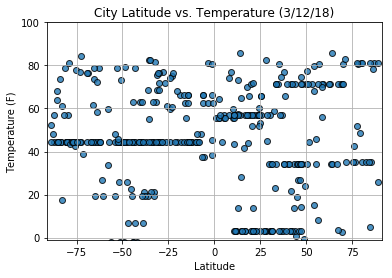

In [49]:
#build a scatter plot showing Temperature (F) vs. Latitude
# i noticed my latitude and longitude calculations were backwards! Adjusting to the correct values
plt.scatter(city_df["Longitude"],
            city_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature (3/12/18)")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-91, 91])
plt.ylim([-1, 100])

# Save the figure
plt.savefig("TempVsLat.png")

# Show plot
plt.show()

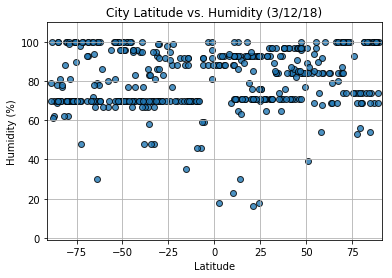

In [50]:
#build a scatter plot showing Humidity (%) vs. Latitude
plt.scatter(city_df["Longitude"],
            city_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (3/12/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-91, 91])
plt.ylim([-1, 110])

# Save the figure
plt.savefig("HumidityVsLat.png")

# Show plot
plt.show()

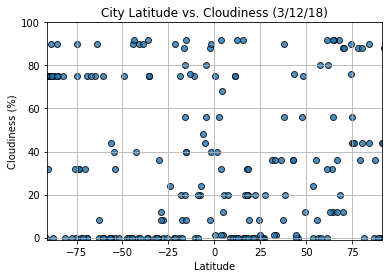

In [51]:
#build a scatter plot showing Cloudiness (%) vs. Latitude
plt.scatter(city_df["Latitude"],
            city_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (3/12/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-91, 91])
plt.ylim([-1, 100])

# Save the figure
plt.savefig("CloudinessVsLat.png")

# Show plot
plt.show()

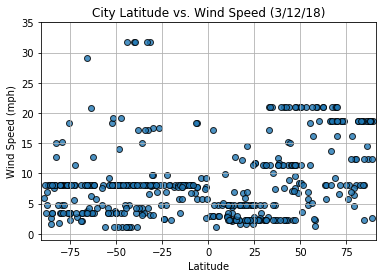

In [52]:
#build a scatter plot showing Wind Speed (mph) vs. Latitude
plt.scatter(city_df["Longitude"],
            city_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (3/12/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-91, 91])
plt.ylim([-1, 35])

# Save the figure
plt.savefig("WindVsLat.png")

# Show plot
plt.show()

# Observable trends
1. I have bad data. It looks like some of the cities were not found in open weather map, and those Nan data points are messing with my plots
2. Because of my data it's hard to see trends. Whatyou'd expect to see is an increase in temperature as you get closer to 0 latitude, and a decrease in temperature as the latitude gets closer to 90 degrees latitude (the North Pole).
3. It seems to be consistently windier as you go north of the equator